In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
dados = pd.read_csv('dados_produtos.csv')

In [6]:
dados.head()

,product_name,rating,rating_count,purchased
0,Televisão,3.04,29,1
1,Celular,3.46,3872,0
2,Cafeteira,3.25,1187,0
3,Televisão,3.77,4097,1
4,Videogame,5.00,4738,1


Text(0.5, 0, 'product_name')

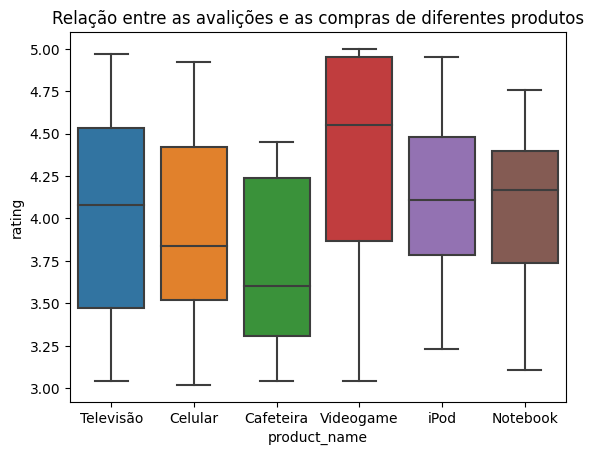

In [7]:
sns.boxplot(x=dados['product_name'], y = dados['rating'])
plt.title('Relação entre as avalições e as compras de diferentes produtos')
plt.ylabel('rating')
plt.xlabel('product_name')

In [8]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  100 non-null    object 
 1   rating        100 non-null    float64
 2   rating_count  100 non-null    int64  
 3   purchased     100 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.2+ KB


In [9]:
dados.describe()

,rating,rating_count,purchased
count,100.000000,100.000000,100.00
mean,4.056900,2536.670000,0.55
std,0.588344,1458.312544,0.50
min,3.020000,10.000000,0.00
25%,3.580000,1433.250000,0.00
50%,4.105000,2424.000000,1.00
75%,4.505000,3773.000000,1.00
max,5.000000,4977.000000,1.00


In [12]:
dados.head(5)

,product_name,rating,rating_count,purchased
0,Televisão,3.04,29,1
1,Celular,3.46,3872,0
2,Cafeteira,3.25,1187,0
3,Televisão,3.77,4097,1
4,Videogame,5.00,4738,1


In [13]:
dados['rating'].isnull().sum()

0

In [14]:
dados['purchased'].isnull().sum()

0

In [15]:
# Separando as características e o rótulo
X = dados['rating']
y = dados['purchased']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
dados = dados.replace('',np.nan)

In [18]:
print(dados.isnull().sum())

product_name    0
rating          0
rating_count    0
purchased       0
dtype: int64


In [19]:
dados["purchased"] = dados["purchased"].map({0:"Não Comprou",1:"Comprou"})

In [20]:
dados.head(5)

,product_name,rating,rating_count,purchased
0,Televisão,3.04,29,Comprou
1,Celular,3.46,3872,Não Comprou
2,Cafeteira,3.25,1187,Não Comprou
3,Televisão,3.77,4097,Comprou
4,Videogame,5.00,4738,Comprou


In [21]:
rating = np.array(dados["rating"])
purchased = np.array(dados["purchased"])
print(len(purchased),len(rating))

100 100


In [22]:
rating_test, rating_treino, purchased_test, purchased_treino = train_test_split(rating.reshape(-1,1),purchased.reshape(-1,1), 
                                                                        test_size=0.2, random_state=42)

In [23]:
modelo = DecisionTreeClassifier()
modelo.fit(rating_treino,purchased_treino)

DecisionTreeClassifier()

[Text(0.6, 0.9285714285714286, '3.04 <= 4.44\ngini = 0.375\nsamples = 20\nvalue = [15, 5]\nclass = Comprou'),
 Text(0.5, 0.7857142857142857, '3.04 <= 4.0\ngini = 0.43\nsamples = 16\nvalue = [11, 5]\nclass = Comprou'),
 Text(0.3, 0.6428571428571429, '3.04 <= 3.21\ngini = 0.219\nsamples = 8\nvalue = [7, 1]\nclass = Comprou'),
 Text(0.2, 0.5, '3.04 <= 3.03\ngini = 0.444\nsamples = 3\nvalue = [2, 1]\nclass = Comprou'),
 Text(0.1, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Comprou'),
 Text(0.3, 0.35714285714285715, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = Comprou'),
 Text(0.4, 0.5, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = Comprou'),
 Text(0.7, 0.6428571428571429, '3.04 <= 4.15\ngini = 0.5\nsamples = 8\nvalue = [4, 4]\nclass = Comprou'),
 Text(0.6, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = Não Comprou'),
 Text(0.8, 0.5, '3.04 <= 4.425\ngini = 0.444\nsamples = 6\nvalue = [4, 2]\nclass = Comprou'),
 Text(0.7, 0.35714285714285715, '3.04

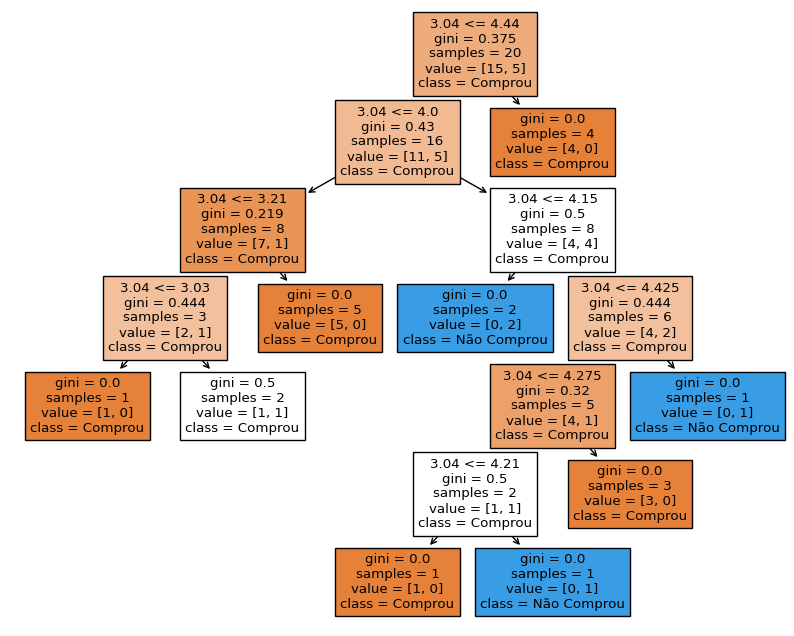

In [24]:
fig = plt.figure(figsize=(10,8))
tree.plot_tree(modelo,feature_names= rating.tolist(), class_names = purchased.tolist(), filled= True)

In [25]:
previsoes = modelo.predict(rating_test)
for i in range(5):
    print(previsoes[i])
    i+=1

Não Comprou
Comprou
Comprou
Comprou
Não Comprou



--------------------------- Árvore de Decisão do Produto Televisão ---------------------------------


--------------------------- Árvore de Decisão do Produto Celular ---------------------------------


--------------------------- Árvore de Decisão do Produto Cafeteira ---------------------------------


--------------------------- Árvore de Decisão do Produto Videogame ---------------------------------


--------------------------- Árvore de Decisão do Produto iPod ---------------------------------


--------------------------- Árvore de Decisão do Produto Notebook ---------------------------------



C:\Users\dsadm\AppData\Local\Temp\ipykernel_16360\1542005422.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_dados['purchased'] = product_dados['purchased'].replace([1, 0], ['Comprou', 'Não Comprou'])
C:\Users\dsadm\AppData\Local\Temp\ipykernel_16360\1542005422.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_dados['purchased'] = product_dados['purchased'].replace([1, 0], ['Comprou', 'Não Comprou'])
C:\Users\dsadm\AppData\Local\Temp\ipykernel_16360\1542005422.py:27: SettingWithCopyW

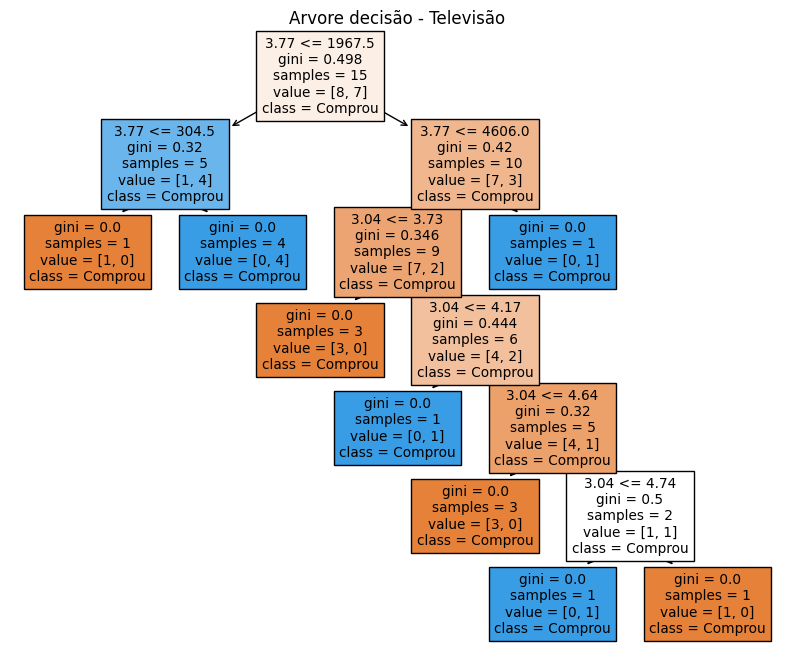

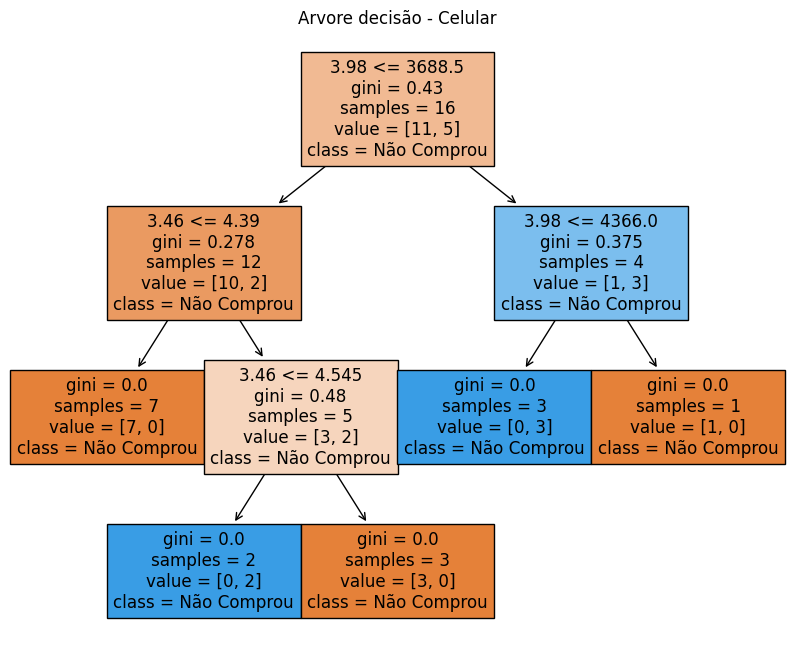

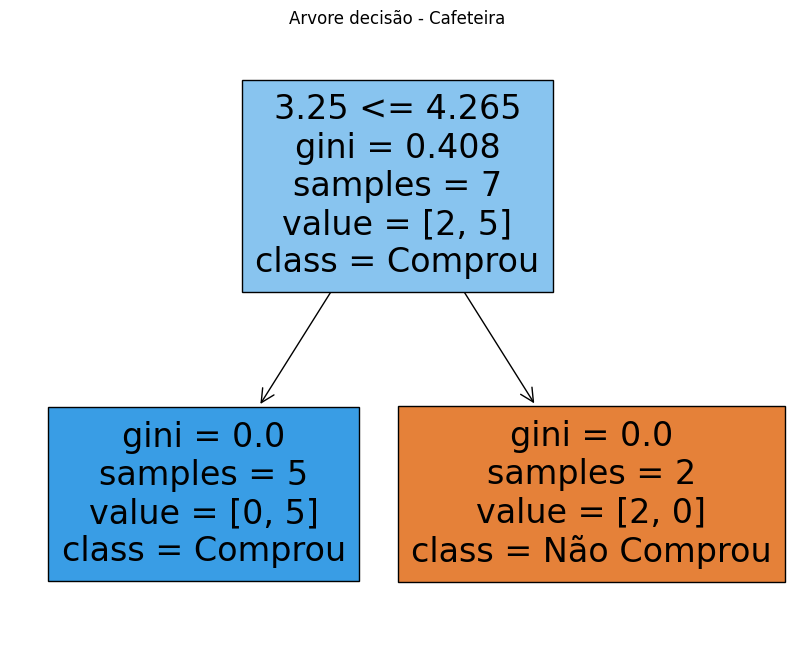

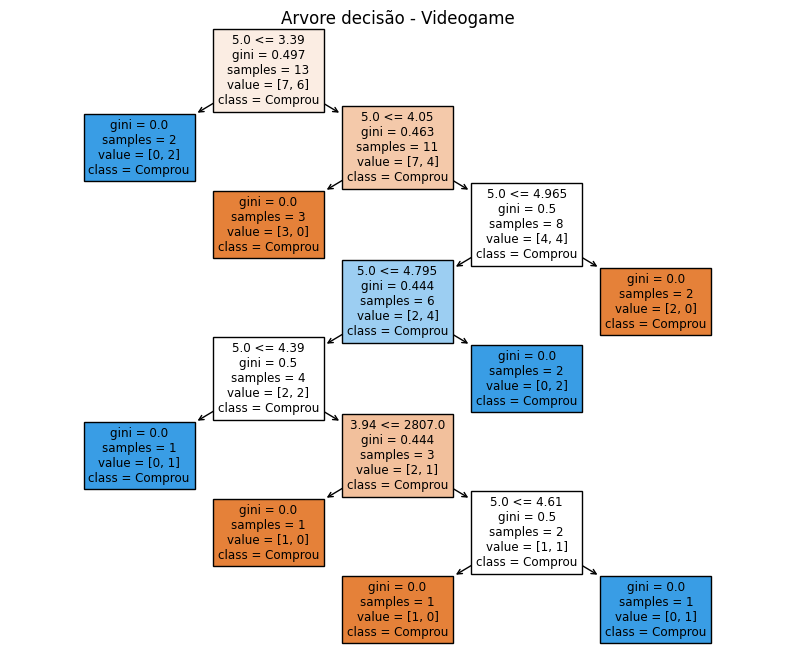

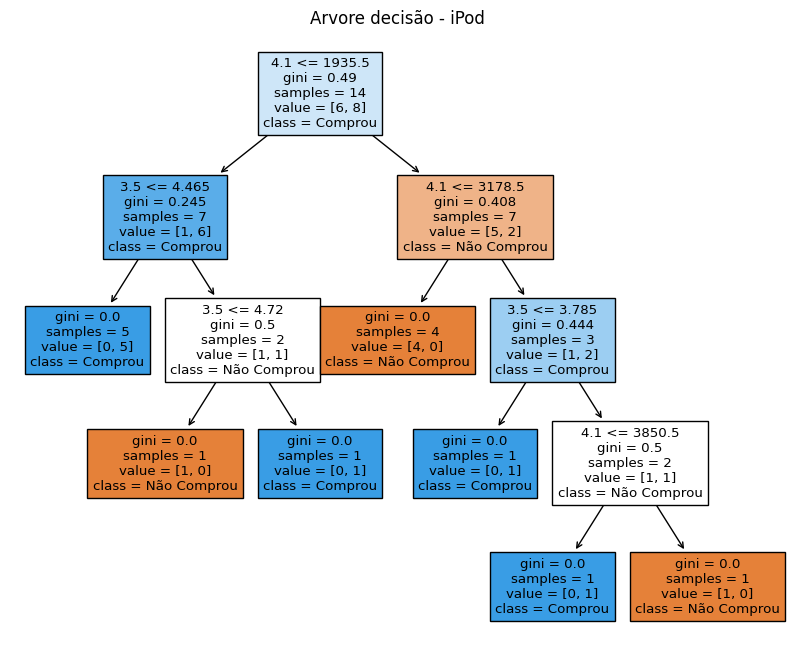

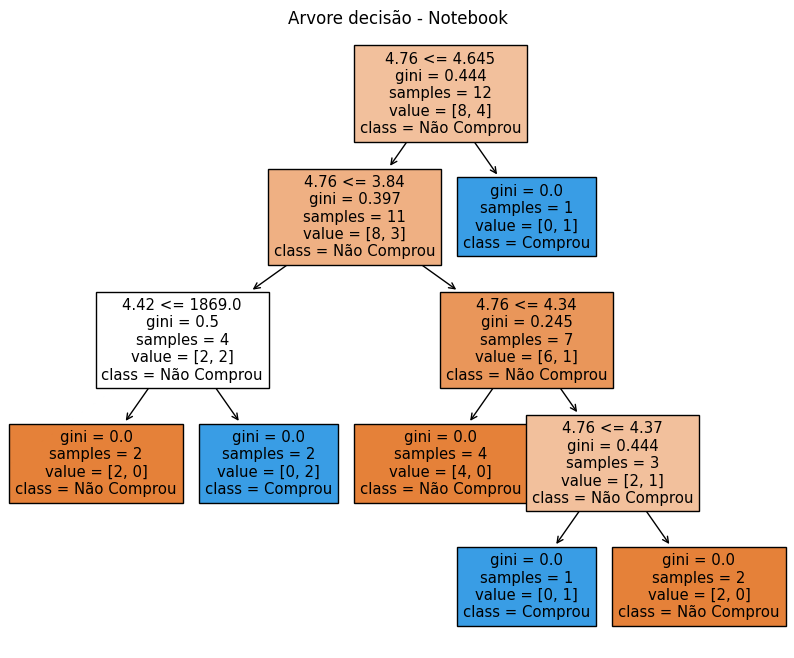

In [31]:
products = dados['product_name'].unique()

for product in products:

    print(f'\n--------------------------- Árvore de Decisão do Produto {product} ---------------------------------\n')
    
    product_dados = dados.loc[dados['product_name'] == product]

    X = product_dados.drop(['purchased', 'product_name'], axis=1)
    y = product_dados['purchased']

    X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    dtc = DecisionTreeClassifier()
    model = dtc.fit(X_train, y_train)
    y_pred = dtc.predict(x_test)

    '''print('Avaliação do Modelo: \n')
    print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
    print(f'F1 Score: {f1_score(y_test, y_pred)}')
    print(f'Precision Score: {precision_score(y_test, y_pred)}')
    print(f'Recall Score: {recall_score(y_test, y_pred)}')
    print(f'Confusion Matrix: {confusion_matrix(y_test, y_pred)}')

    print('\nVisualização da Árvore:')'''

    product_dados['purchased'] = product_dados['purchased'].replace([1, 0], ['Comprou', 'Não Comprou'])
    
    fig = plt.figure(figsize=(10, 8))
    
    tree.plot_tree(model, feature_names=product_dados['rating'].tolist(), class_names=product_dados['purchased'].tolist(), filled= True)
    plt.title(f'Arvore decisão - {product}')